<a href="https://colab.research.google.com/github/yashsinghkvojhar/yashsinghkvojhar/blob/main/Operating_Room_Utilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Operating_room_utilization_dataset.csv')

In [5]:
df.head()

,index,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
0,0,10001,01/03/22,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,01/03/22 07:00 AM,01/03/22 07:05 AM,01/03/22 07:32 AM,01/03/22 09:05 AM,01/03/22 09:17 AM
1,1,10002,01/03/22,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,01/03/22 08:45 AM,01/03/22 09:48 AM,01/03/22 10:13 AM,01/03/22 11:01 AM,01/03/22 11:12 AM
2,2,10003,01/03/22,1,Podiatry,28297,Lapidus bunionectomy,150,01/03/22 10:00 AM,01/03/22 11:50 AM,01/03/22 12:20 PM,01/03/22 12:42 PM,01/03/22 12:58 PM
3,3,10004,01/03/22,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,01/03/22 12:45 PM,01/03/22 01:29 PM,01/03/22 01:53 PM,01/03/22 02:50 PM,01/03/22 03:02 PM
4,4,10005,01/03/22,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,01/03/22 07:00 AM,01/03/22 07:15 AM,01/03/22 07:50 AM,01/03/22 09:38 AM,01/03/22 09:51 AM


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              2172 non-null   int64 
 1   Encounter ID       2172 non-null   int64 
 2   Date               2172 non-null   object
 3   OR Suite           2172 non-null   int64 
 4   Service            2172 non-null   object
 5   CPT Code           2172 non-null   int64 
 6   CPT Description    2172 non-null   object
 7   Booked Time (min)  2172 non-null   int64 
 8   OR Schedule        2172 non-null   object
 9   Wheels In          2172 non-null   object
 10  Start Time         2172 non-null   object
 11  End Time           2172 non-null   object
 12  Wheels Out         2172 non-null   object
dtypes: int64(5), object(8)
memory usage: 220.7+ KB


Observations
* index and Encounter ID is not required for any analysis thus droping index and Encounter ID
* Date,OR Schedule,Wheels In,Start Time,End Time and Wheels Out is in object type need it in datetime format.

In [7]:
df=df.drop(['index','Encounter ID'],axis=1)

In [8]:

df['Date'] = pd.to_datetime(df['Date'])
df['OR Schedule'] = pd.to_datetime(df['OR Schedule'])
df['Wheels In'] = pd.to_datetime(df['Wheels In'])
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])
df['Wheels Out'] = pd.to_datetime(df['Wheels Out'])


<ipython-input-8-674e177155b3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-8-674e177155b3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OR Schedule'] = pd.to_datetime(df['OR Schedule'])
<ipython-input-8-674e177155b3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Wheels In'] = pd.to_datetime(df['Wheels In'])
<ipython-input-8-674e177155b3>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2172 non-null   datetime64[ns]
 1   OR Suite           2172 non-null   int64         
 2   Service            2172 non-null   object        
 3   CPT Code           2172 non-null   int64         
 4   CPT Description    2172 non-null   object        
 5   Booked Time (min)  2172 non-null   int64         
 6   OR Schedule        2172 non-null   datetime64[ns]
 7   Wheels In          2172 non-null   datetime64[ns]
 8   Start Time         2172 non-null   datetime64[ns]
 9   End Time           2172 non-null   datetime64[ns]
 10  Wheels Out         2172 non-null   datetime64[ns]
dtypes: datetime64[ns](6), int64(3), object(2)
memory usage: 186.8+ KB


In [10]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
OR Suite,2172.0,4.288674,2.163514,1.0,3.0,4.0,6.0,8.0
CPT Code,2172.0,44881.405617,18087.419079,14060.0,28296.0,42826.0,66982.0,69436.0
Booked Time (min),2172.0,77.189227,30.430015,30.0,60.0,60.0,90.0,180.0


Observations:
* OR Suite: This appears to be a categorical variable with 2172 observations. The mean is approximately 4.29, with a standard deviation of about 2.16. The minimum value observed is 1, the maximum is 8, and quartiles are at 25%, 50%, and 75%.

* CPT Code: This variable seems to represent medical procedure codes. The mean CPT code is approximately 44881.41, with a standard deviation of around 18087.42. The minimum observed code is 14060, and the maximum is 69436. Quartiles are at 25%, 50%, and 75%.

* Booked Time (min): This variable indicates the duration of booked time for procedures, measured in minutes. The mean booked time is roughly 77.19 minutes, with a standard deviation of about 30.43 minutes. The minimum booked time is 30 minutes, and the maximum is 180 minutes. Quartiles are at 25%, 50%, and 75%.

In [11]:
df.describe(include='object').T

,count,unique,top,freq
Service,2172,10,Ophthalmology,334
CPT Description,2172,32,Extracapsular cataract removal,334


Observations:
* Service: This variable appears to represent the type of medical service provided. There are 2172 observations in total, with 10 unique categories. The most frequent category is "Ophthalmology" with a frequency of 334.

* CPT Description: This variable seems to describe the medical procedure corresponding to the CPT code. Again, there are 2172 observations in total, with 32 unique descriptions. The most frequent description is "Extracapsular cataract removal" with a frequency of 334.

In [12]:
df.describe(include='datetime64[ns]').T

,count,mean,min,25%,50%,75%,max
Date,2172,2022-02-16 00:09:16.906077440,2022-01-03 00:00:00,2022-01-25 00:00:00,2022-02-16 00:00:00,2022-03-10 00:00:00,2022-03-31 00:00:00
OR Schedule,2172,2022-02-16 09:48:15.580110336,2022-01-03 07:00:00,2022-01-25 11:15:00,2022-02-16 08:15:00,2022-03-10 09:30:00,2022-03-31 14:00:00
Wheels In,2172,2022-02-16 10:23:48.149171200,2022-01-03 07:03:00,2022-01-25 12:33:45,2022-02-16 08:37:30,2022-03-10 10:30:15,2022-03-31 14:30:00
Start Time,2172,2022-02-16 10:45:19.944751616,2022-01-03 07:13:00,2022-01-25 12:57:15,2022-02-16 09:00:00,2022-03-10 10:54:00,2022-03-31 14:50:00
End Time,2172,2022-02-16 11:30:48.453038848,2022-01-03 07:31:00,2022-01-25 13:35:15,2022-02-16 09:30:30,2022-03-10 11:40:00,2022-03-31 15:50:00
Wheels Out,2172,2022-02-16 11:43:29.972375808,2022-01-03 07:38:00,2022-01-25 13:48:15,2022-02-16 09:44:00,2022-03-10 11:55:00,2022-03-31 16:02:00


Observations:
* Date: This variable likely represents the date of a particular event. The mean date is approximately 2022-02-16, with a minimum date of 2022-01-03 and a maximum date of 2022-03-31. Quartiles are at 25%, 50%, and 75%.

* OR Schedule: This could represent the scheduled time for operating room procedures. The mean schedule time is around 09:48:15, with a minimum of 07:00:00 and a maximum of 14:00:00. Quartiles are at 25%, 50%, and 75%.

* Wheels In: This likely denotes the time when equipment or patients arrived at a certain location. The mean time is approximately 10:23:48, with a minimum of 07:03:00 and a maximum of 14:30:00. Quartiles are at 25%, 50%, and 75%.

Start Time: This probably represents the start time of a medical procedure. The mean start time is roughly 10:45:19, with a minimum of 07:13:00 and a maximum of 14:50:00. Quartiles are at 25%, 50%, and 75%.

* End Time: This likely indicates the completion time of a medical procedure. The mean end time is around 11:30:48, with a minimum of 07:31:00 and a maximum of 15:50:00. Quartiles are at 25%, 50%, and 75%.

* Wheels Out: This could represent the time when equipment or patients left a certain location. The mean time is approximately 11:43:29, with a minimum of 07:38:00 and a maximum of 16:02:00. Quartiles are at 25%, 50%, and 75%.

Missing value imputation

In [13]:
df.isnull().sum()

Date                 0
OR Suite             0
Service              0
CPT Code             0
CPT Description      0
Booked Time (min)    0
OR Schedule          0
Wheels In            0
Start Time           0
End Time             0
Wheels Out           0
dtype: int64

No null values

Outliers detetion

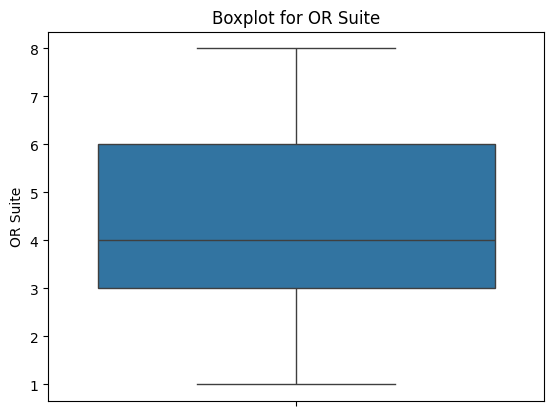

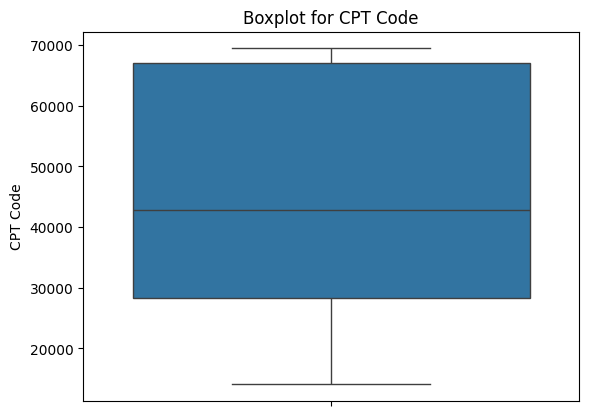

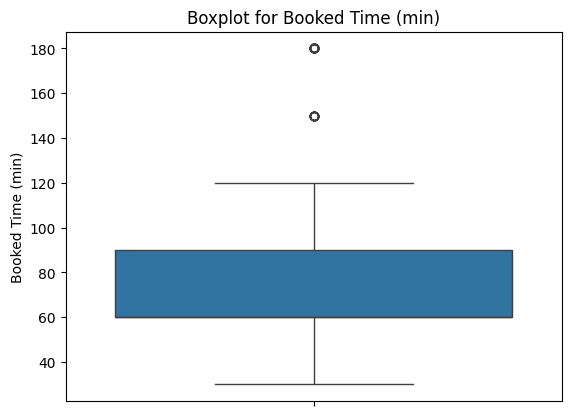

In [14]:
# Get all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical column
for col in numerical_columns:
  plt.figure()
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot for {col}')
  plt.show()


In [15]:
def find_outliers(df, numerical_columns):
  outliers = {}
  for col in numerical_columns:
    # Calculate the interquartile range (IQR)
    q1 = np.percentile(df[col], 25, interpolation='midpoint')
    q3 = np.percentile(df[col], 75, interpolation='midpoint')
    iqr = q3 - q1

    # Calculate the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index
    outliers[col] = {
      'count': len(outlier_indices),
      'percentage': len(outlier_indices) / len(df) * 100
    }

  return outliers

# Find outliers
outliers = find_outliers(df, numerical_columns)

# Print the results
for col, outlier_info in outliers.items():
  print(f'Column: {col}')
  print(f'Number of outliers: {outlier_info["count"]}')
  print(f'Percentage of outliers: {outlier_info["percentage"]:.2f}%')
  print()


Column: OR Suite
Number of outliers: 0
Percentage of outliers: 0.00%

Column: CPT Code
Number of outliers: 0
Percentage of outliers: 0.00%

Column: Booked Time (min)
Number of outliers: 54
Percentage of outliers: 2.49%



<ipython-input-15-1b5e363dc272>:23: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  outliers = find_outliers(df, numerical_columns)


lets drop these outliers as it is very small


In [16]:

 for col in numerical_columns:
    # Calculate the interquartile range (IQR)
    q1 = np.percentile(df[col], 25, interpolation='midpoint')
    q3 = np.percentile(df[col], 75, interpolation='midpoint')
    iqr = q3 - q1

    # Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
for col, outlier_info in outliers.items():
  if outlier_info['percentage'] > 0:
    # Get the indices of the outliers
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index

    # Drop the outliers
    df = df.drop(outlier_indices)



In [17]:
# Find outliers
outliers = find_outliers(df, numerical_columns)

# Print the results
for col, outlier_info in outliers.items():
  print(f'Column: {col}')
  print(f'Number of outliers: {outlier_info["count"]}')
  print(f'Percentage of outliers: {outlier_info["percentage"]:.2f}%')
  print()

Column: OR Suite
Number of outliers: 0
Percentage of outliers: 0.00%

Column: CPT Code
Number of outliers: 0
Percentage of outliers: 0.00%

Column: Booked Time (min)
Number of outliers: 0
Percentage of outliers: 0.00%



<ipython-input-17-73b5184fc1c2>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  outliers = find_outliers(df, numerical_columns)


Outlier's removed successfully


Segmenting Date

In [18]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek


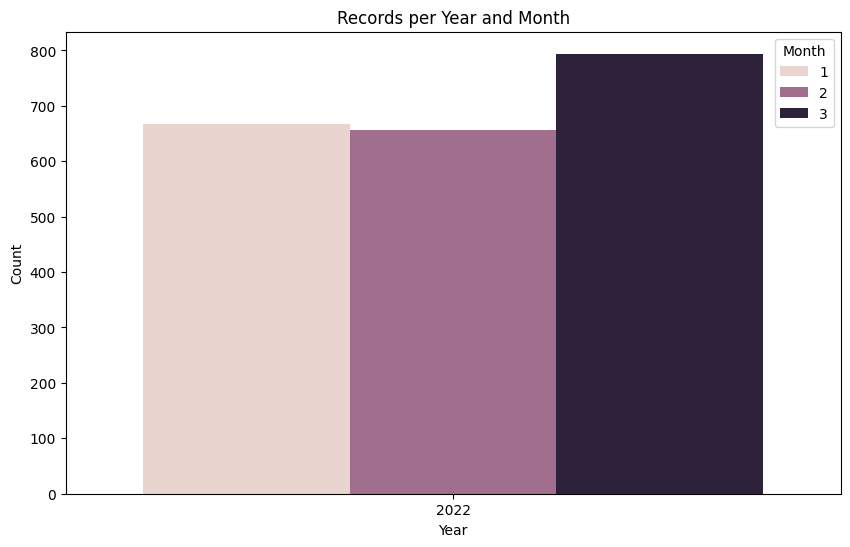

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Month', data=df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Records per Year and Month')
plt.legend(title='Month', loc='upper right')
plt.show()


Observations:
* Month 1 and 2 are approximatly equal at average 650 where as month 3 is at arounfd 780

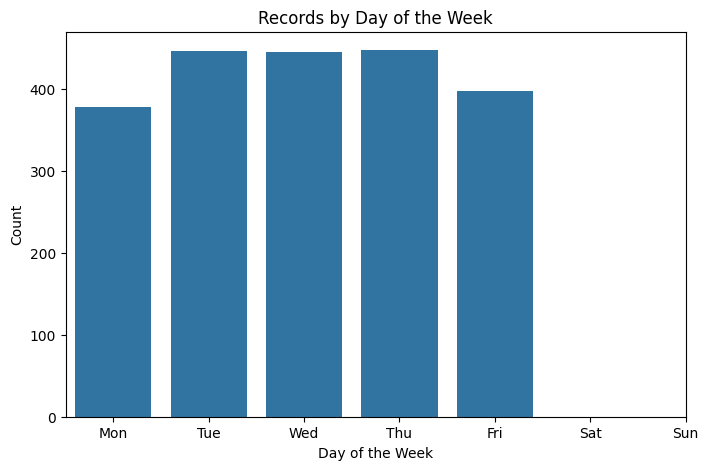

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='DayOfWeek', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Records by Day of the Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


Observations:
* Weekday's are working days and weekends are non working day.
* Most number of cases on Tuesday,Wednesday and Thursday.

In [21]:


for col in df.select_dtypes(exclude=['datetime64[ns]']).columns:
  print(f'Value counts for column "{col}":')
  print(df[col].value_counts())
  print()


Value counts for column "OR Suite":
OR Suite
3    439
7    288
5    286
4    268
2    252
1    228
8    186
6    171
Name: count, dtype: int64

Value counts for column "Service":
Service
Ophthalmology    334
Orthopedics      321
Podiatry         228
Pediatrics       220
ENT              197
Urology          193
Vascular         173
Plastic          171
OBGYN            164
General          117
Name: count, dtype: int64

Value counts for column "CPT Code":
CPT Code
66982    334
42826    151
69436    132
29877    112
36901     95
69421     88
14060     86
28296     85
27445     82
58562     82
57460     82
43775     78
28820     78
55250     78
52353     76
17110     69
30520     46
28060     42
28285     42
64721     42
47562     39
55873     39
27130     23
28289     23
26045     21
26735     21
26356     20
28055     18
28110     18
30400     16
Name: count, dtype: int64

Value counts for column "CPT Description":
CPT Description
Extracapsular cataract removal                        3

Univariate Analysis


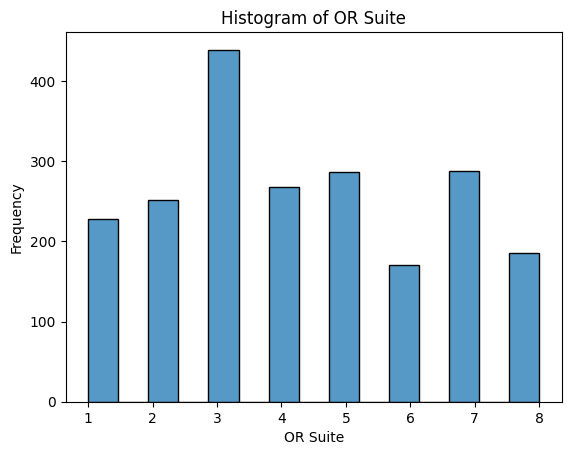

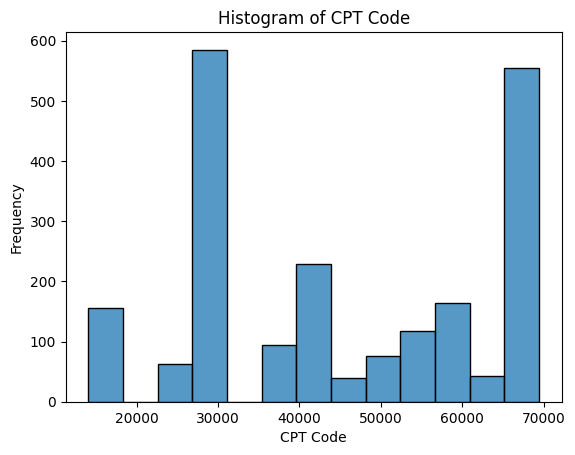

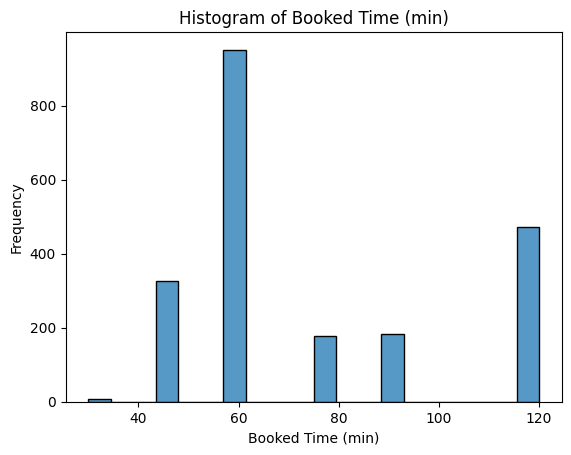

In [22]:

for col in numerical_columns:
  plt.figure()
  sns.histplot(df[col])
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


Observations:
* OR suite 3 is mostly booked and no 6,7 least. Other averages at (200,300).
* CPT Code of 3000 and 6500 are used most at 500+ whereas  other ranges in below 250 which is half of most used CPT Code.
* Booked Time is mostly for 60mins with approx 900 counts others are below 500 counts.

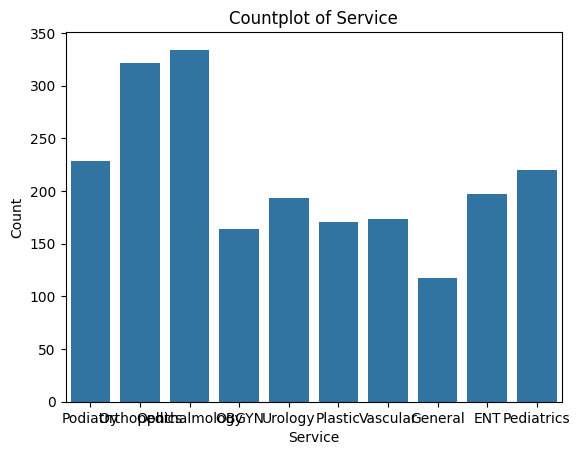

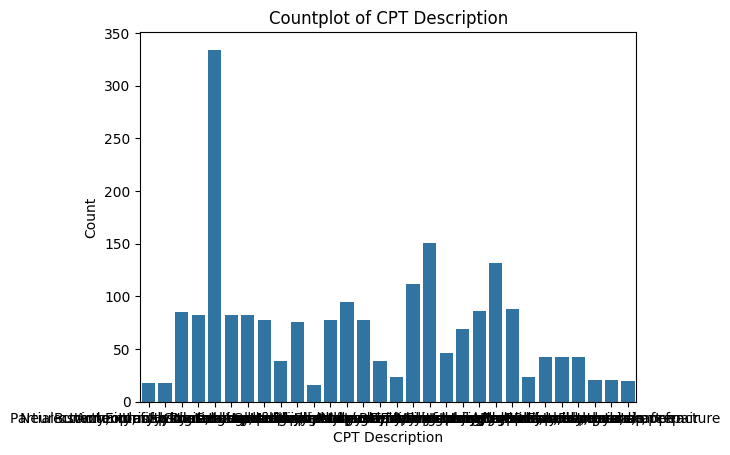

In [23]:

for col in df.select_dtypes(include=['object']):
  plt.figure()
  sns.countplot(x=col, data=df)
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


In [41]:
df['Service'].value_counts().head(10)

Service
Ophthalmology    334
Orthopedics      321
Podiatry         228
Pediatrics       220
ENT              197
Urology          193
Vascular         173
Plastic          171
OBGYN            164
General          117
Name: count, dtype: int64

In [24]:
df['CPT Description'].value_counts().head(10)


CPT Description
Extracapsular cataract removal                        334
Tonsillectomy                                         151
Tympanostomy, general anesthesia                      132
Arthroscopy, knee, surgical                           112
AV fistula                                             95
Myringotomy, general anesthesia                        88
Adjacent tissue transfer, eyelids, nose, ears, lip     86
Bunionectomy with distal osteotomy                     85
Arthroplasty, knee, hinge prothesis                    82
Hysterectomy, surgical                                 82
Name: count, dtype: int64

Observations:
* Service or speciality of Ophthalmology,
Orthopedics ranges above 320 counts whereas others are approx below 220 counts.
* Extracapsular cataract removal is mostly treated procedure with 334 counts and others are below 150 counts which is half of most treated procedure.


Bivariate Analysis

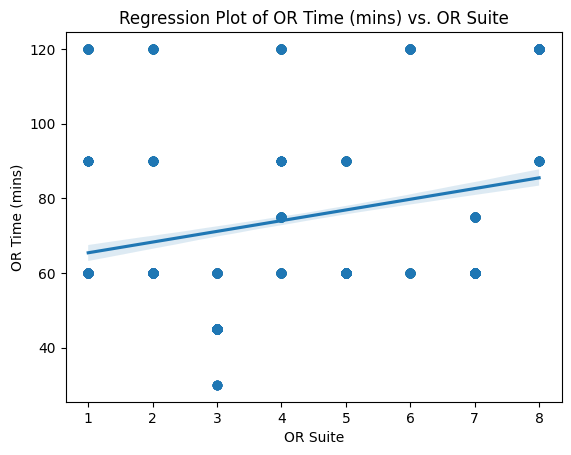

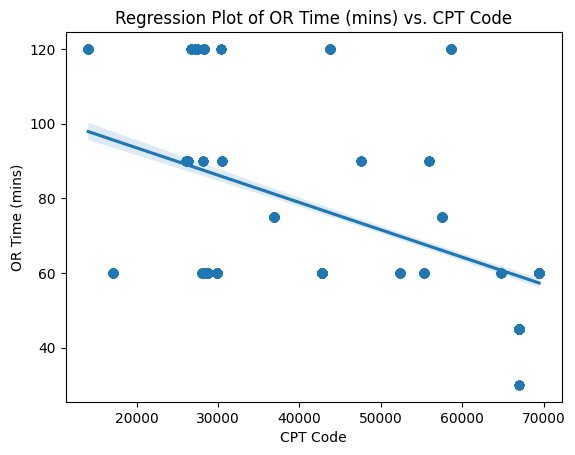

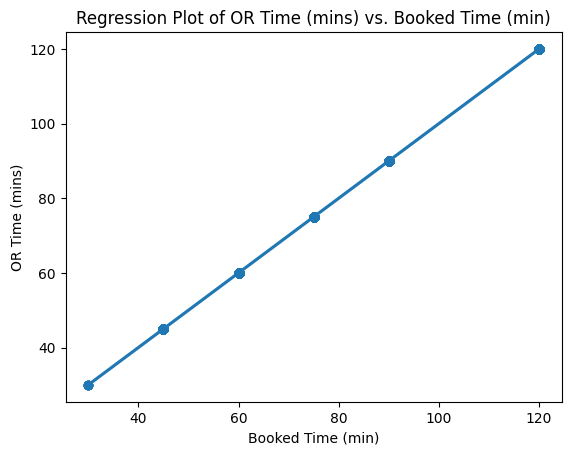

In [25]:

# Iterate through numerical columns
for col in numerical_columns:
  # Create a regplot for each numerical column against the target variable
  sns.regplot(x=df[col], y=df['Booked Time (min)'])
  plt.title(f'Regression Plot of OR Time (mins) vs. {col}')
  plt.xlabel(col)
  plt.ylabel('OR Time (mins)')
  plt.show()


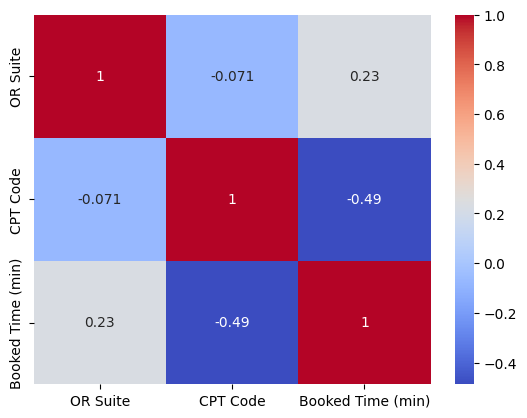

In [26]:


# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Observations:
* No highly correlated columns

Pre-processing


In [27]:

df['Total_OR_Time_Used'] = (df['Wheels Out'] - df['Wheels In']).dt.total_seconds() / 60
df['Total_Available_OR_Time'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60


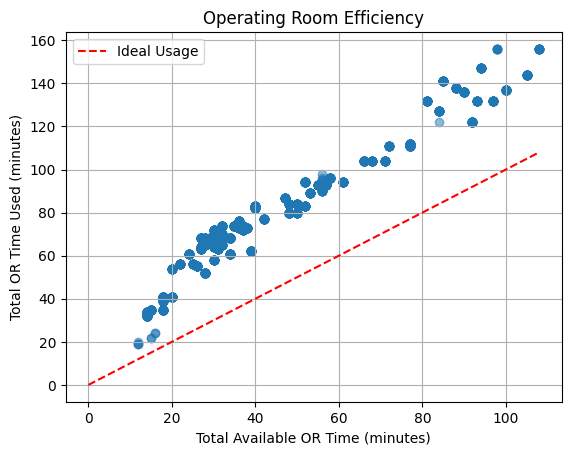

In [28]:
# Create a scatter plot
plt.scatter(df['Total_Available_OR_Time'], df['Total_OR_Time_Used'], alpha=0.5)
plt.xlabel('Total Available OR Time (minutes)')
plt.ylabel('Total OR Time Used (minutes)')
plt.title('Operating Room Efficiency')

# Add a diagonal line for reference (ideal usage)
plt.plot([0, max(df['Total_Available_OR_Time'])], [0, max(df['Total_Available_OR_Time'])], color='red', linestyle='--', label='Ideal Usage')

plt.legend()
plt.grid(True)
plt.show()

Observations:
* As we can observe that the OR time is overused then the Ideal Usage

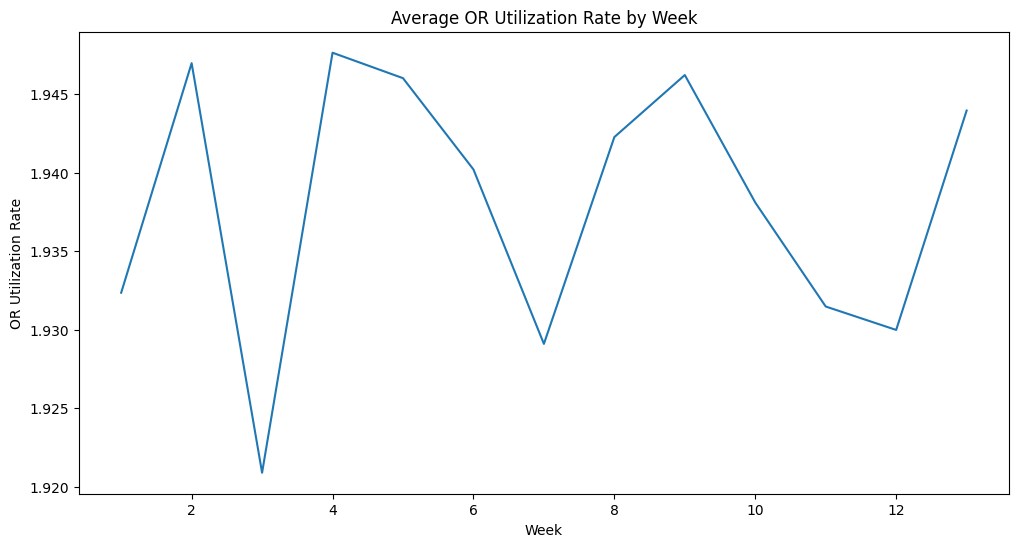

In [29]:

# Calculate the OR utilization rate for each week
df['OR_Utilization_Rate'] = df['Total_OR_Time_Used'] / df['Total_Available_OR_Time']

# Group by week and calculate the average utilization rate
weekly_utilization = df.groupby(df['Date'].dt.isocalendar().week)['OR_Utilization_Rate'].mean()

# Plot the average OR utilization rate for each week
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_utilization)
plt.xlabel('Week')
plt.ylabel('OR Utilization Rate')
plt.title('Average OR Utilization Rate by Week')
plt.show()


In [30]:

# Calculate time differences
df['OR_Schedule_to_Wheels_In'] = df['Wheels In'] - df['OR Schedule']
df['Wheels_In_to_Start_Time'] = df['Start Time'] - df['Wheels In']
df['Start_Time_to_End_Time'] = df['End Time'] - df['Start Time']
df['End_Time_to_Wheels_Out'] = df['Wheels Out'] - df['End Time']

# Convert time differences to minutes
df['OR_Schedule_to_Wheels_In_minutes'] = df['OR_Schedule_to_Wheels_In'].dt.total_seconds() / 60
df['Wheels_In_to_Start_Time_minutes'] = df['Wheels_In_to_Start_Time'].dt.total_seconds() / 60
df['Start_Time_to_End_Time_minutes'] = df['Start_Time_to_End_Time'].dt.total_seconds() / 60
df['End_Time_to_Wheels_Out_minutes'] = df['End_Time_to_Wheels_Out'].dt.total_seconds() / 60



In [31]:

# Create a pivot table with average delay and standard deviation for each stage and OR suite
df_delays = df.pivot_table(index='OR Suite',
                     values=['OR_Schedule_to_Wheels_In_minutes', 'Wheels_In_to_Start_Time_minutes',
                             'Start_Time_to_End_Time_minutes', 'End_Time_to_Wheels_Out_minutes'],
                     aggfunc=['mean', 'std'])

# Print the results
print(df_delays.to_string())


                                   mean                                                                                                                            std                                                                                                
         End_Time_to_Wheels_Out_minutes OR_Schedule_to_Wheels_In_minutes Start_Time_to_End_Time_minutes Wheels_In_to_Start_Time_minutes End_Time_to_Wheels_Out_minutes OR_Schedule_to_Wheels_In_minutes Start_Time_to_End_Time_minutes Wheels_In_to_Start_Time_minutes
OR Suite                                                                                                                                                                                                                                                              
1                             13.355263                        45.052632                      58.995614                       24.057018                       3.117539                        30.217520            

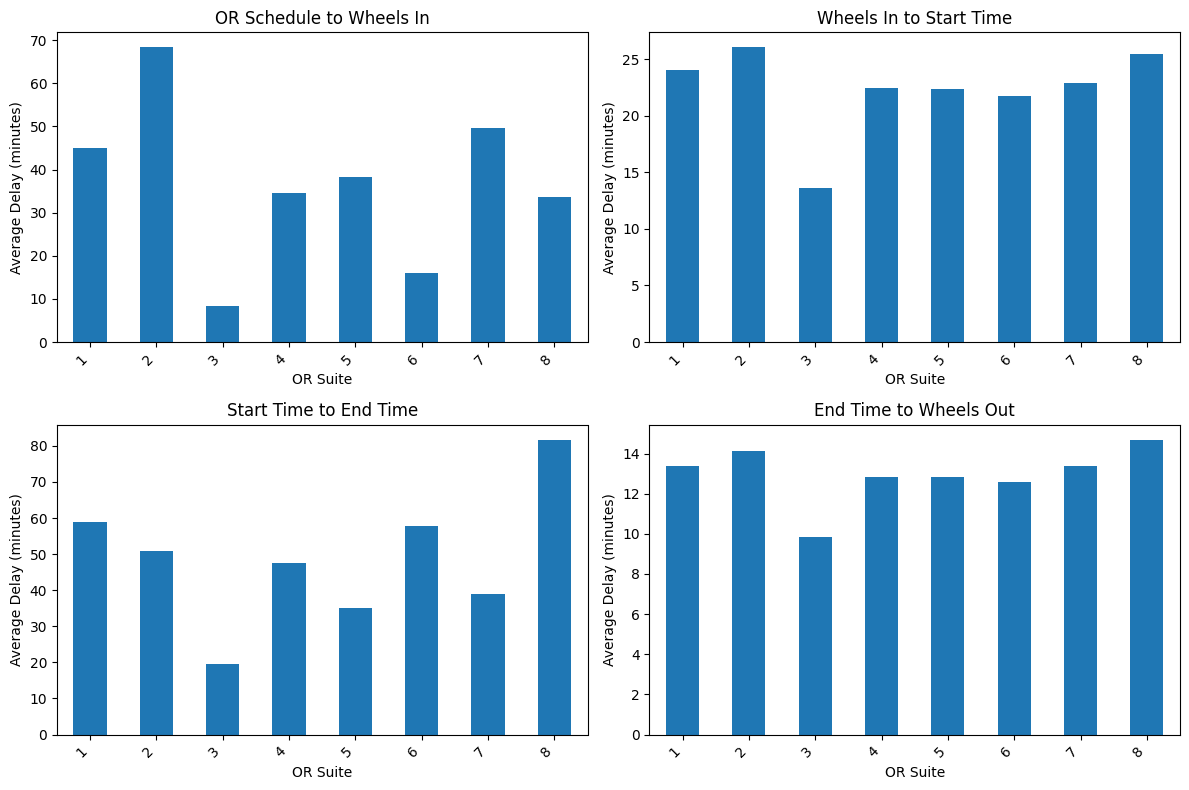

In [32]:

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the average delay for each stage and OR suite
df_delays.loc[:, ('mean', 'OR_Schedule_to_Wheels_In_minutes')].plot(kind='bar', ax=axes[0, 0], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'Wheels_In_to_Start_Time_minutes')].plot(kind='bar', ax=axes[0, 1], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'Start_Time_to_End_Time_minutes')].plot(kind='bar', ax=axes[1, 0], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'End_Time_to_Wheels_Out_minutes')].plot(kind='bar', ax=axes[1, 1], ylabel='Average Delay (minutes)')

# Set the title for each subplot
axes[0, 0].set_title('OR Schedule to Wheels In')
axes[0, 1].set_title('Wheels In to Start Time')
axes[1, 0].set_title('Start Time to End Time')
axes[1, 1].set_title('End Time to Wheels Out')

# Rotate the x-axis labels for better readability
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Observations:
* End_Time_to_Wheels_Out_minutes: The mean duration from the end time of a procedure to when the wheels are out ranges from approximately 9.86 to 14.69 minutes across different OR suites. There doesn't seem to be a significant spike or outlier in this data, as the means are relatively consistent across the different categories.

* OR_Schedule_to_Wheels_In_minutes: The mean duration from the scheduled OR time to when the wheels are in varies from around 8.26 to 68.42 minutes. Here, there seems to be a noticeable spike in the mean for "OR Suite 2", where the mean duration is considerably higher compared to other categories. This might indicate a longer wait time between the scheduled OR time and the arrival of equipment or patients for procedures in this particular suite.

* Start_Time_to_End_Time_minutes: The mean duration of the procedure from its start time to its end time ranges from approximately 19.63 to 81.73 minutes. There doesn't appear to be a significant spike in this data, although there is some variability across different OR suites and OR suite 8 is comparatively larger.

* Wheels_In_to_Start_Time_minutes: The mean duration from when the wheels are in to the start time of the procedure varies from about 1.90 to 7.90 minutes. Again, there isn't a clear spike in this data, but there are differences in mean durations across the different OR suites.

* Overall, while there are variations in mean durations across different stages of medical procedures and OR suites, the most notable observation is the relatively high mean duration for "OR Suite 2" in the interval from OR schedule to wheels in.

In [33]:

# Create a pivot table with average delay and standard deviation for each stage and procedures
df_delays = df.pivot_table(index='CPT Code',
                     values=['OR_Schedule_to_Wheels_In_minutes', 'Wheels_In_to_Start_Time_minutes',
                             'Start_Time_to_End_Time_minutes', 'End_Time_to_Wheels_Out_minutes'],
                     aggfunc=['mean', 'std'])

# Print the results
print(df_delays.to_string())

                                   mean                                                                                                                            std                                                                                                
         End_Time_to_Wheels_Out_minutes OR_Schedule_to_Wheels_In_minutes Start_Time_to_End_Time_minutes Wheels_In_to_Start_Time_minutes End_Time_to_Wheels_Out_minutes OR_Schedule_to_Wheels_In_minutes Start_Time_to_End_Time_minutes Wheels_In_to_Start_Time_minutes
CPT Code                                                                                                                                                                                                                                                              
14060                         14.023256                        16.325581                      75.453488                       22.534884                       1.226921                        21.357154            

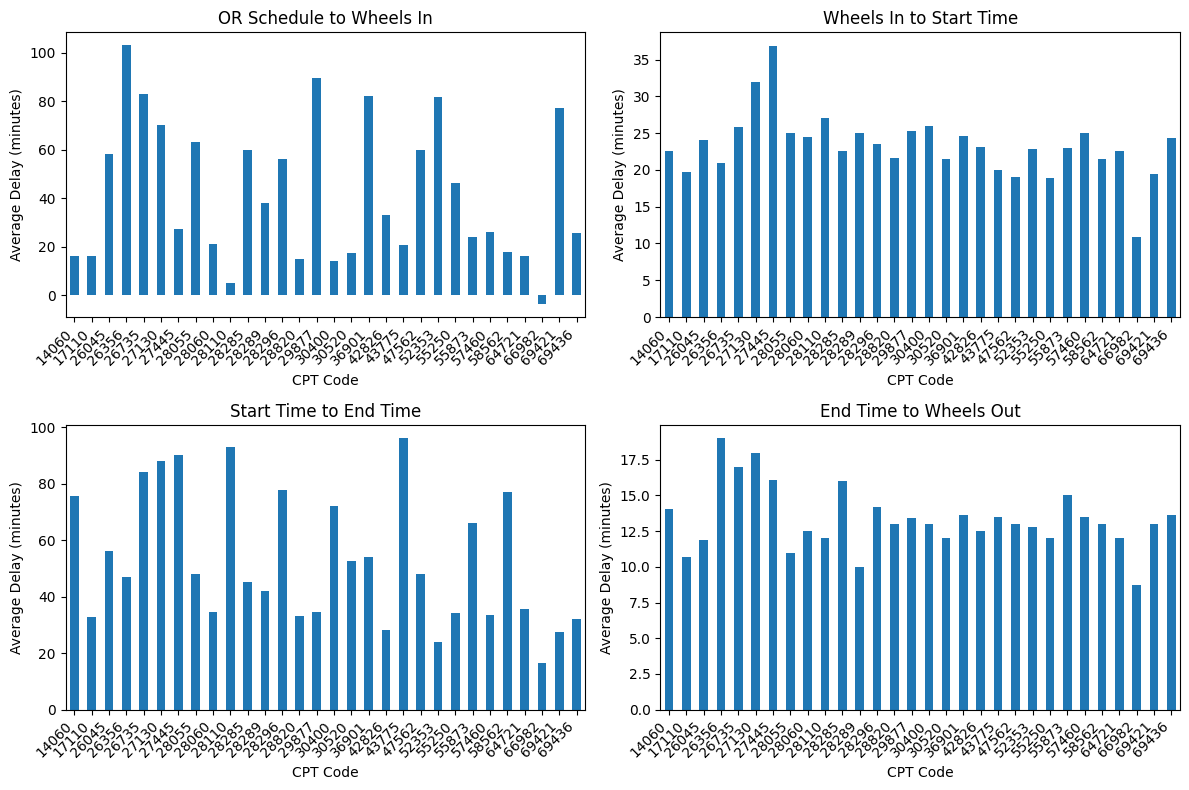

In [34]:

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the average delay for each stage and OR suite
df_delays.loc[:, ('mean', 'OR_Schedule_to_Wheels_In_minutes')].plot(kind='bar', ax=axes[0, 0], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'Wheels_In_to_Start_Time_minutes')].plot(kind='bar', ax=axes[0, 1], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'Start_Time_to_End_Time_minutes')].plot(kind='bar', ax=axes[1, 0], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'End_Time_to_Wheels_Out_minutes')].plot(kind='bar', ax=axes[1, 1], ylabel='Average Delay (minutes)')

# Set the title for each subplot
axes[0, 0].set_title('OR Schedule to Wheels In')
axes[0, 1].set_title('Wheels In to Start Time')
axes[1, 0].set_title('Start Time to End Time')
axes[1, 1].set_title('End Time to Wheels Out')

# Rotate the x-axis labels for better readability
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Observations:
* End_Time_to_Wheels_Out_minutes: The mean durations range from approximately 8.75 to 19 minutes. There doesn't seem to be a significant spike in this data, although "CPT Code 66982" has a notably lower mean duration compared to others.

* OR_Schedule_to_Wheels_In_minutes: Mean durations vary widely, ranging from approximately -3.67 to 103 minutes. "CPT Code 66982" has a negative mean duration, which could indicate a data entry error or anomaly. "CPT Code 26356" and "CPT Code 27130" have relatively high mean durations, potentially indicating longer wait times between OR schedule and wheels in.

* Start_Time_to_End_Time_minutes: Mean durations range from around 17 to 96 minutes. There isn't a clear spike in this data, but "CPT Code 26356" has a notably high mean duration compared to others, suggesting longer procedure durations for this code.

* Wheels_In_to_Start_Time_minutes: Mean durations vary from approximately 10.82 to 36.85 minutes. "CPT Code 66982" stands out again with a lower mean duration compared to others.

In [35]:

# Create a pivot table with average delay and standard deviation for each stage and Service
df_delays = df.pivot_table(index='Service',
                     values=['OR_Schedule_to_Wheels_In_minutes', 'Wheels_In_to_Start_Time_minutes',
                             'Start_Time_to_End_Time_minutes', 'End_Time_to_Wheels_Out_minutes'],
                     aggfunc=['mean', 'std'])

# Print the results
print(df_delays.to_string())

                                        mean                                                                                                                            std                                                                                                
              End_Time_to_Wheels_Out_minutes OR_Schedule_to_Wheels_In_minutes Start_Time_to_End_Time_minutes Wheels_In_to_Start_Time_minutes End_Time_to_Wheels_Out_minutes OR_Schedule_to_Wheels_In_minutes Start_Time_to_End_Time_minutes Wheels_In_to_Start_Time_minutes
Service                                                                                                                                                                                                                                                                    
ENT                                12.416244                        29.527919                      33.944162                       22.736041                       1.625480                        2

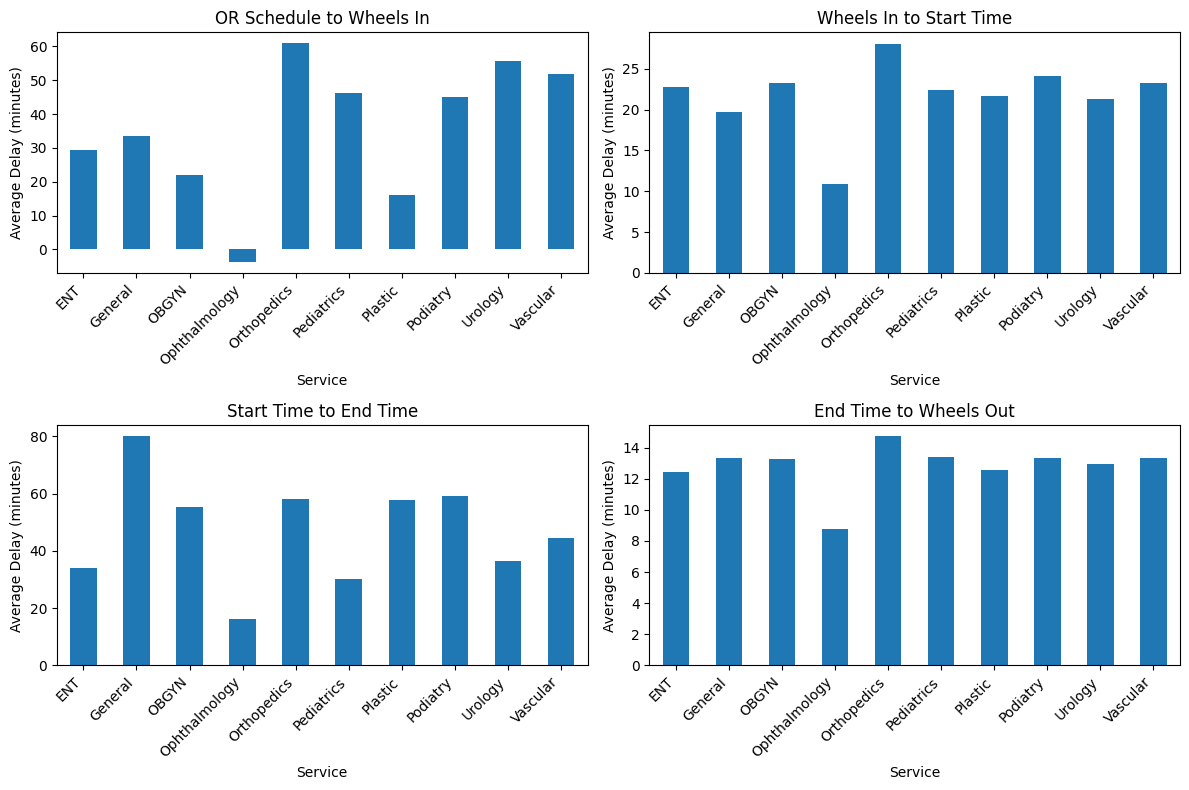

In [36]:

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the average delay for each stage and OR suite
df_delays.loc[:, ('mean', 'OR_Schedule_to_Wheels_In_minutes')].plot(kind='bar', ax=axes[0, 0], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'Wheels_In_to_Start_Time_minutes')].plot(kind='bar', ax=axes[0, 1], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'Start_Time_to_End_Time_minutes')].plot(kind='bar', ax=axes[1, 0], ylabel='Average Delay (minutes)')
df_delays.loc[:, ('mean', 'End_Time_to_Wheels_Out_minutes')].plot(kind='bar', ax=axes[1, 1], ylabel='Average Delay (minutes)')

# Set the title for each subplot
axes[0, 0].set_title('OR Schedule to Wheels In')
axes[0, 1].set_title('Wheels In to Start Time')
axes[1, 0].set_title('Start Time to End Time')
axes[1, 1].set_title('End Time to Wheels Out')

# Rotate the x-axis labels for better readability
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Observations:
* End_Time_to_Wheels_Out_minutes: Mean durations range from approximately 8.75 to 14.73 minutes across different medical services. There doesn't appear to be a significant spike in this data.

* OR_Schedule_to_Wheels_In_minutes: Mean durations vary from around -3.67 to 60.95 minutes. "Ophthalmology" stands out with a negative mean duration, indicating a potential data anomaly or error. "Orthopedics" also has a notably high mean duration compared to others.

* Start_Time_to_End_Time_minutes: Mean durations range from approximately 16.30 to 80 minutes. "Ophthalmology" again stands out with a lower mean duration compared to others, which could indicate shorter procedure durations for this service. "Orthopedics" has a notably high mean duration compared to others.

* Wheels_In_to_Start_Time_minutes: Mean durations vary from approximately 10.82 to 28.06 minutes. "Ophthalmology" has a lower mean duration compared to others, while "Orthopedics" has a notably higher mean duration.

Regarding spikes:

* "Ophthalmology" stands out with a negative mean duration in the "OR_Schedule_to_Wheels_In_minutes" category, which is unusual and warrants further investigation to understand the underlying cause.
* "Orthopedics" exhibits notably high mean durations in both the "OR_Schedule_to_Wheels_In_minutes" and "Start_Time_to_End_Time_minutes" categories, indicating potential complexities or longer durations associated with orthopedic procedures.

In [37]:

df['Surgical_Duration'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60
df['Time_Difference'] = df['Booked Time (min)'] - df['Surgical_Duration']

# Calculate the average time difference
average_time_difference = df['Time_Difference'].mean()

# Print the average time difference
print(f"Average time difference between booked time and surgical duration: {average_time_difference:.2f} minutes")


Average time difference between booked time and surgical duration: 30.45 minutes


In [38]:

# Group by procedure and calculate the average time difference
average_time_difference_by_procedure = df.groupby('CPT Code')['Time_Difference'].mean()

# Print the average time difference for each procedure
print(average_time_difference_by_procedure.to_string())

# Sort the average time difference in descending order
sorted_average_time_difference = average_time_difference_by_procedure.sort_values(ascending=False)

# Print the top 10 procedures with the largest average time difference
print(f"Top 10 procedures with the largest average time difference:")
print(sorted_average_time_difference.head(10))

# Repeat the same analysis for specialties and surgeons
average_time_difference_by_specialty = df.groupby('Service')['Time_Difference'].mean()
average_time_difference_by_or_suite = df.groupby('OR Suite')['Time_Difference'].mean()

# Print the results
print(f"Average time difference by specialty:")
print(average_time_difference_by_specialty.to_string())

print(f"Average time difference by OR suite:")
print(average_time_difference_by_or_suite.to_string())



CPT Code
14060    44.546512
17110    27.333333
26045    34.000000
26356    43.000000
26735    36.000000
27130    32.000000
27445    29.829268
28055    12.000000
28060    25.500000
28110    -3.000000
28285    15.000000
28289    18.000000
28296    42.258824
28820    27.000000
29877    25.303571
30400    48.000000
30520    37.500000
36901    20.894737
42826    31.708609
43775    24.000000
47562    42.000000
52353    36.013158
55250    25.961538
55873    24.000000
57460    41.500000
58562    43.000000
64721    24.500000
66982    28.338323
69421    32.500000
69436    28.000000
Top 10 procedures with the largest average time difference:
CPT Code
30400    48.000000
14060    44.546512
58562    43.000000
26356    43.000000
28296    42.258824
47562    42.000000
57460    41.500000
30520    37.500000
52353    36.013158
26735    36.000000
Name: Time_Difference, dtype: float64
Average time difference by specialty:
Service
ENT              33.060914
General          30.000000
OBGYN            42.2500

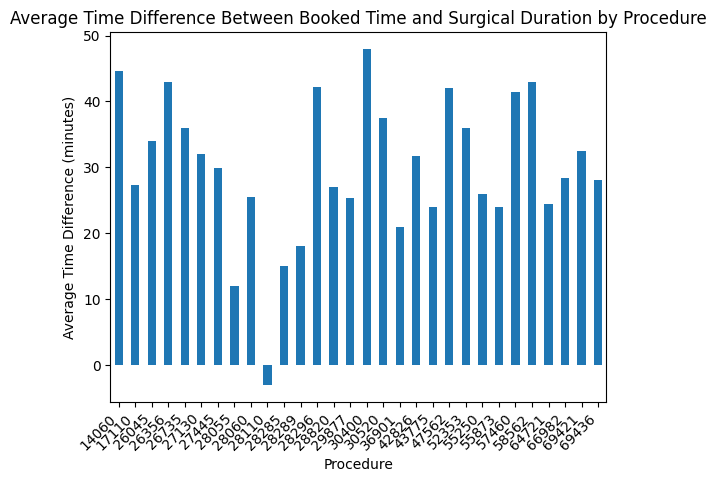

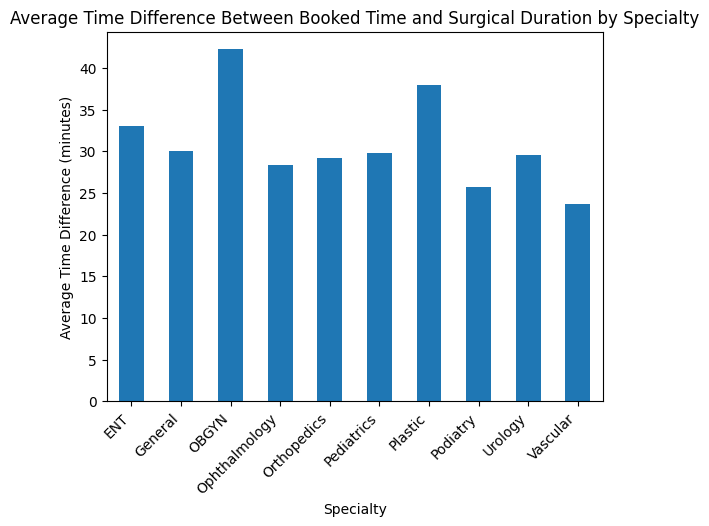

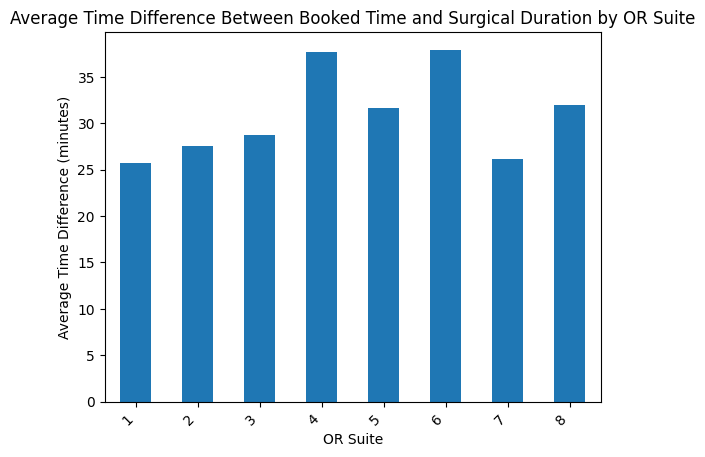

In [39]:

# Create a bar plot of average time difference by procedure
average_time_difference_by_procedure.plot(kind='bar')
plt.xlabel('Procedure')
plt.ylabel('Average Time Difference (minutes)')
plt.title('Average Time Difference Between Booked Time and Surgical Duration by Procedure')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a bar plot of average time difference by specialty
average_time_difference_by_specialty.plot(kind='bar')
plt.xlabel('Specialty')
plt.ylabel('Average Time Difference (minutes)')
plt.title('Average Time Difference Between Booked Time and Surgical Duration by Specialty')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a bar plot of average time difference by OR suite
average_time_difference_by_or_suite.plot(kind='bar')
plt.xlabel('OR Suite')
plt.ylabel('Average Time Difference (minutes)')
plt.title('Average Time Difference Between Booked Time and Surgical Duration by OR Suite')
plt.xticks(rotation=45, ha='right')
plt.show()


Observations:
* Average time difference by CPT Code: The average time differences for different CPT codes range from approximately -3 to 48 minutes. "CPT Code 28110" stands out with a negative average time difference, indicating a potential anomaly or data error. The top 10 procedures with the largest average time differences include "CPT Code 30400" with the highest average time difference of 48 minutes.

* Average time difference by Specialty: The average time differences by specialty range from approximately 23.65 to 42.25 minutes. There doesn't appear to be a significant spike in this data, although "OBGYN" has the highest average time difference, indicating potentially longer durations for procedures in this specialty.

* Average time difference by OR Suite: The average time differences by OR suite range from approximately 25.74 to 37.92 minutes. There doesn't seem to be a significant spike in this data, although "OR Suite 4" and "OR Suite 6" have relatively higher average time differences compared to others.

Regarding spikes:

* "CPT Code 28110" stands out with a negative average time difference, which is unusual and may indicate a data anomaly or error.
* There doesn't appear to be a clear spike in the average time differences by specialty or OR suite.

In [40]:
date_columns=df.select_dtypes(include='datetime').columns
for i in date_columns:
  print(i)
  print(df[i].isnull().sum())
  print(df[i].dt.hour.isnull().sum())

Date
0
0
OR Schedule
0
0
Wheels In
0
0
Start Time
0
0
End Time
0
0
Wheels Out
0
0


No cancellation

**Conclusions:**
* **Utilization of OR Suites:** There is variability in the utilization of different OR suites, with some being more frequently booked than others. OR Suite 3 seems to be consistently busy, while Suites 6 and 7 are less utilized. This could indicate a need for optimization of scheduling or resource allocation.

* **Distribution of CPT Codes and Booked Time:** The distribution of CPT codes shows variations in the frequency of different medical procedures. Some CPT codes are more commonly used, while others are less frequent. Similarly, most procedures are booked for around 60 minutes, but there are variations in booking durations.

* **Specialty Distribution:** Certain medical specialties, such as Ophthalmology and Orthopedics, have higher frequencies of procedures compared to others. This could reflect the demand for specific types of medical services within the facility.

* **Time Differences and Efficiency:** There are noticeable differences in time durations across various stages of medical procedures and OR suites. Identifying and addressing any outliers or inefficiencies, such as longer wait times or procedure durations, could improve overall operational efficiency.

* **Anomalies and Errors:** There are instances of negative time differences and unusual spikes in certain data points, such as negative durations or unusually long wait times. These anomalies should be investigated further to ensure data integrity and identify potential errors in recording or calculation.

* **No Cancellations:** It appears that there were no cancellations recorded in the observations provided. Understanding the reasons behind cancellations, if any, could provide insights into operational challenges or patient scheduling issues.

In conclusion, analyzing the provided observations can help identify patterns, anomalies, and areas for improvement in the operation of the medical facility. Addressing inefficiencies and anomalies can lead to better resource utilization, improved patient care, and overall optimization of healthcare delivery processes.

**Recommendations:**

* **Optimization of OR Suite Utilization:**

Conduct a thorough analysis of OR suite scheduling patterns to identify peak and off-peak times.
Consider redistributing procedures across different OR suites to balance the workload and optimize resource utilization.
Implement a flexible scheduling system that allows for efficient allocation of OR suites based on demand and availability.

* **Streamlining Booking Procedures:**

Standardize booking procedures to ensure consistency and accuracy in recording procedure durations.
Provide training for staff members involved in booking procedures to optimize scheduling practices.
Implement automated scheduling systems to streamline the booking process and minimize errors.

* **Specialty-Specific Resource Allocation:**

Allocate resources, including staff and equipment, based on the demand for specific medical specialties.
Ensure that each specialty has adequate resources to meet patient needs and optimize operational efficiency.
Consider adjusting staffing levels or equipment availability based on the fluctuating demand for different specialties.

* **Efficiency Improvement Initiatives:**

Identify and address inefficiencies in the medical procedure workflow, such as long wait times or excessive procedure durations.
Implement process improvement initiatives, such as Lean or Six Sigma methodologies, to streamline workflow processes and reduce unnecessary delays.
Encourage collaboration and communication among healthcare providers to identify opportunities for efficiency improvements and implement best practices.

* **Data Integrity and Error Prevention:**

Conduct regular audits of data recording processes to ensure accuracy and integrity of the data.
Implement quality control measures to identify and correct errors or anomalies in the data.
Provide training for staff members on proper data recording and documentation practices to minimize errors and ensure data consistency.

* **Continuous Monitoring and Improvement:**

Establish key performance indicators (KPIs) to monitor OR suite utilization, booking efficiency, and procedure durations.
Conduct regular performance reviews to evaluate progress towards optimization goals and identify areas for further improvement.
Encourage a culture of continuous improvement within the organization, where staff members are empowered to identify and address operational challenges proactively.